# Data Preparation for the Poster Project--Environmental Statistics of Cyprus

![alt text](google_earth_cyp1.png "GENCI")

In [2]:
import pandas as pd
import numpy as np
import pylab
from datetime import date
import matplotlib.pyplot as plt
from IPython.display import display_html
import matplotlib.dates as mdates
import matplotlib.pyplot as plt
%matplotlib inline

C:\Users\90533\Anaconda3\lib\site-packages\pandas\compat\_optional.py:138: UserWarning: Pandas requires version '2.7.0' or newer of 'numexpr' (version '2.6.9' currently installed).
  warnings.warn(msg, UserWarning)


## Morphou


In [ ]:
dfmt = pd.read_excel("Morphou.xlsx")
dfmtr= pd.read_excel("morphou_temp_range.xlsx")
dfmp=pd.read_excel("morphou_precipitation.xlsx")
dfmvp=pd.read_excel("Morphou_vapor_pressure.xlsx")
#####
dfmt['Mean Temperature(°C)']=dfmt["Value"]
dfmtr['Temperature Range(°C)']=dfmtr["Value"]
dfmp['Precipitation (mm)']=dfmp["Value"]
dfmvp['Vapor Pressure (HPa)']=dfmvp["Value"]

In [120]:
df1=dfmt.head()
df2=dfmtr.head()
df3=dfmp.head()
df4=dfmvp.head()


df1_styler = df1.style.set_table_attributes("style='display:inline'").set_caption('Morphou Mean Temperature')
df2_styler = df2.style.set_table_attributes("style='display:inline'").set_caption('Morphou Temperature Range')
df3_styler = df3.style.set_table_attributes("style='display:inline'").set_caption('Morphou Precipitation')
df4_styler = df4.style.set_table_attributes("style='display:inline'").set_caption('Morphou Vapor Pressure')

display_html(df1_styler._repr_html_() + df2_styler._repr_html_() + df3_styler._repr_html_() + df4_styler._repr_html_(), raw=True)


,Yr,Mo,Value,N,Mean Temperature(°C)
0,1901,1,11.000000,7,11.000000
1,1901,2,13.600000,7,13.600000
2,1901,3,13.500000,5,13.500000
3,1901,4,16.800000,6,16.800000
4,1901,5,19.300000,7,19.300000
,Yr,Mo,Value,Obs,Temperature Range(°C)
0,1901,1,8.900000,2,8.900000
1,1901,2,9.000000,1,9.000000
2,1901,3,10.300000,1,10.300000
3,1901,4,11.200000,1,11.200000


In [134]:
## Merge Datasets
dfm1=pd.merge(dfmt,dfmtr,on=['Yr','Mo'],how="outer")
dfm1=dfm1.drop(columns=['Value_x','Value_y','Obs','N'])
dfm2=pd.merge(dfmp,dfmvp,on=['Yr','Mo'],how='outer')
dfm2=dfm2.drop(columns=['Value_x','Obs_x','Value_y','Obs_y','Syn'])
###
dfm=pd.merge(dfm1,dfm2,on=['Yr','Mo'],how='outer')
dfm=dfm.rename(columns={'Mo':'Month'})
dfm.head()

,Yr,Month,Mean Temperature(°C),Temperature Range(°C),Precipitation (mm),Vapor Pressure (HPa)
0,1901,1,11.0,8.9,101.0,8.9
1,1901,2,13.6,9.0,4.8,10.7
2,1901,3,13.5,10.3,20.1,10.2
3,1901,4,16.8,11.2,5.6,11.7
4,1901,5,19.3,11.9,76.6,12.7


In [135]:
Date = []
for y,m in zip(dfm.Yr,dfm.Month) :
    Date.append(date(y,m,1))
dfm["Date"]=Date
dfm=dfm.drop(columns=['Yr','Month'])
dfm.head()

,Mean Temperature(°C),Temperature Range(°C),Precipitation (mm),Vapor Pressure (HPa),Date
0,11.0,8.9,101.0,8.9,1901-01-01
1,13.6,9.0,4.8,10.7,1901-02-01
2,13.5,10.3,20.1,10.2,1901-03-01
3,16.8,11.2,5.6,11.7,1901-04-01
4,19.3,11.9,76.6,12.7,1901-05-01


### Visualizations for Check

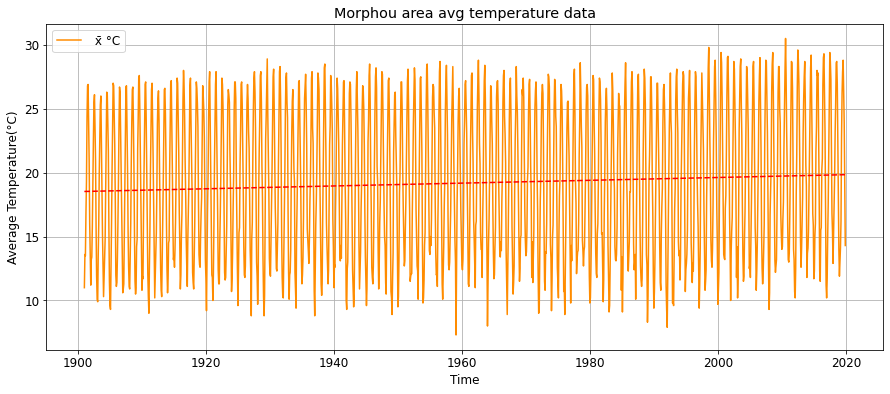

In [144]:
plt.rc('font', size=12)
fig, ax = plt.subplots(figsize=(15, 6))

# Specify how our lines should look
ax.plot(dfm['Date'], dfm['Mean Temperature(°C)'], color='darkorange', label=' x̄ °C')

# Same as above
ax.set_xlabel('Time')
ax.set_ylabel('Average Temperature(°C)')
ax.set_title('Morphou area avg temperature data')
ax.grid(True)
ax.legend(loc='upper left')

x=mdates.date2num(dfm['Date'])
y=dfm['Mean Temperature(°C)']
z = np.polyfit(x, y, 1)
p = np.poly1d(z)
pylab.plot(x, p(x), "r--")

In [ ]:
plt.rc('font', size=12)
fig, ax = plt.subplots(figsize=(15, 6))

# Specify how our lines should look
ax.plot(dfm['Date'], dfm['Mean Temperature(°C)'], color='darkorange', label=' x̄ °C')

# Same as above
ax.set_xlabel('Time')
ax.set_ylabel('Average Temperature(°C)')
ax.set_title('Morphou area avg temperature data')
ax.grid(True)
ax.legend(loc='upper left')

x=mdates.date2num(dfm['Date'])
y=dfm['Mean Temperature(°C)']
z = np.polyfit(x, y, 1)
p = np.poly1d(z)
pylab.plot(x, p(x), "r--")

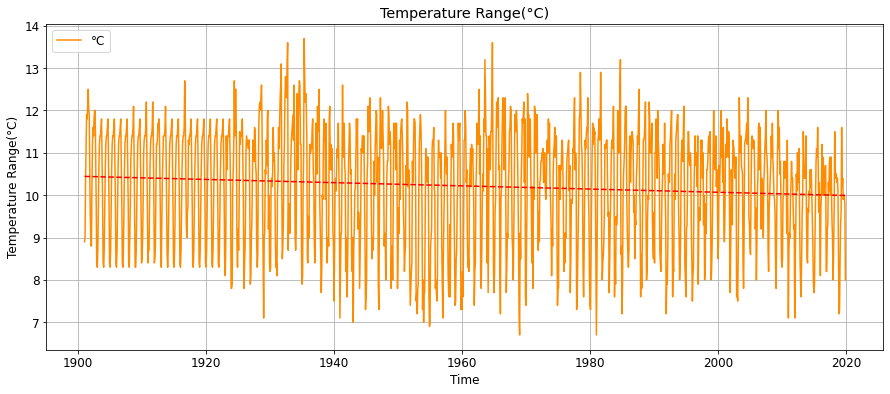

In [145]:
plt.rc('font', size=12)
fig, ax = plt.subplots(figsize=(15, 6))

# Specify how our lines should look
ax.plot(dfm['Date'], dfm['Temperature Range(°C)'], color='darkorange', label='°C')

# Same as above
ax.set_xlabel('Time')
ax.set_ylabel('Temperature Range(°C)')
ax.set_title('Temperature Range(°C)')
ax.grid(True)
ax.legend(loc='upper left')

x=mdates.date2num(dfm['Date'])
y=dfm['Temperature Range(°C)']
z = np.polyfit(x, y, 1)
p = np.poly1d(z)
pylab.plot(x, p(x), "r--")

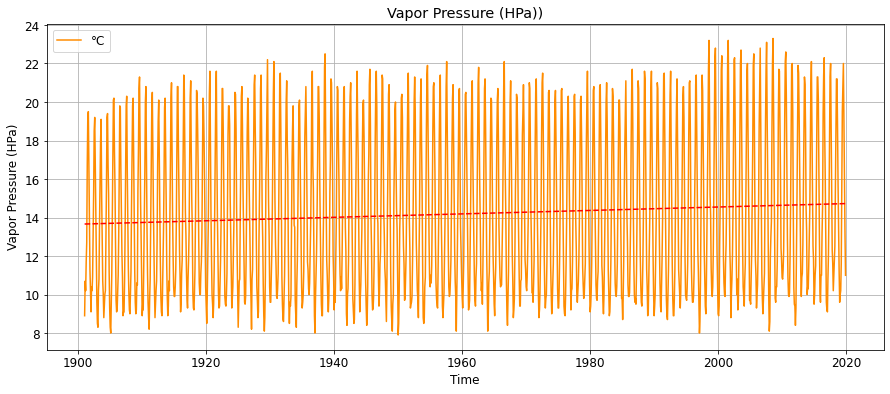

In [150]:
plt.rc('font', size=12)
fig, ax = plt.subplots(figsize=(15, 6))

# Specify how our lines should look
ax.plot(dfm['Date'], dfm['Vapor Pressure (HPa)'], color='darkorange', label='°C')

# Same as above
ax.set_xlabel('Time')
ax.set_ylabel('Vapor Pressure (HPa)')
ax.set_title('Vapor Pressure (HPa))')
ax.grid(True)
ax.legend(loc='upper left')

x=mdates.date2num(dfm['Date'])
y=dfm['Vapor Pressure (HPa)']
z = np.polyfit(x, y, 1)
p = np.poly1d(z)
pylab.plot(x, p(x), "r--")

## Nicosia-Kyrenia--Vertical Area

In [3]:
nkt = pd.read_excel("nicosia_kyrenia_temp.xlsx")
nktr= pd.read_excel("nicosia_kyrenia_temp_range.xlsx")
nkp=pd.read_excel("nicosia_kyrenia_precipitation.xlsx")
nkvp=pd.read_excel("nicosia_kyrenia_vapor_pressure.xlsx")
#####
nkt['Mean Temperature(°C)']=nkt["Value"]
nktr['Temperature Range(°C)']=nktr["Value"]
nkp['Precipitation (mm)']=nkp["Value"]
nkvp['Vapor Pressure (HPa)']=nkvp["Value"]

In [4]:
df1=nkt.head()
df2=nktr.head()
df3=nkp.head()
df4=nkvp.head()


df1_styler = df1.style.set_table_attributes("style='display:inline'").set_caption('Nicosia -Kyrenia Area Mean Temperature')
df2_styler = df2.style.set_table_attributes("style='display:inline'").set_caption('Nicosia -Kyrenia AreaTemperature Range')
df3_styler = df3.style.set_table_attributes("style='display:inline'").set_caption('Nicosia -Kyrenia Area Precipitation')
df4_styler = df4.style.set_table_attributes("style='display:inline'").set_caption('Nicosia -Kyrenia Area Vapor Pressure')

display_html(df1_styler._repr_html_() + df2_styler._repr_html_() + df3_styler._repr_html_() + df4_styler._repr_html_(), raw=True)

,Yr,Mo,Value,Obs,Mean Temperature(°C)
0,1901,1,10.300000,8,10.300000
1,1901,2,13.100000,8,13.100000
2,1901,3,13.600000,6,13.600000
3,1901,4,17.600000,7,17.600000
4,1901,5,20.500000,8,20.500000
,Yr,Mo,Value,Obs,Temperature Range(°C)
0,1901,1,10.000000,2,10.000000
1,1901,2,10.200000,1,10.200000
2,1901,3,12.000000,1,12.000000
3,1901,4,13.400000,1,13.400000


In [13]:
## Merge Datasets
nk1=pd.merge(nkt,nktr,on=['Yr','Mo'],how="outer")
nk1=nk1.drop(columns=['Value_x','Value_y','Obs_x','Obs_y'])
nk2=pd.merge(nkp,nkvp,on=['Yr','Mo'],how='outer')
nk2=nk2.drop(columns=['Value_x','Obs_x','Value_y','Obs_y','Syn'])
###
nikyr=pd.merge(nk1,nk2,on=['Yr','Mo'],how='outer')
nikyr=nk3.rename(columns={'Mo':'Month'})
nikyr.head()

,Yr,Month,Mean Temperature(°C),Temperature Range(°C),Precipitation (mm),Vapor Pressure (HPa)
0,1901,1,10.3,10.0,68.0,8.6
1,1901,2,13.1,10.2,3.5,10.5
2,1901,3,13.6,12.0,15.8,9.8
3,1901,4,17.6,13.4,5.3,10.9
4,1901,5,20.5,14.5,85.2,11.5


In [14]:
Date = []
for y,m in zip(nikyr.Yr,nikyr.Month) :
    Date.append(date(y,m,1))
nikyr["Date"]=Date
nikyr=nikyr.drop(columns=['Yr','Month'])
nikyr.head()

,Mean Temperature(°C),Temperature Range(°C),Precipitation (mm),Vapor Pressure (HPa),Date
0,10.3,10.0,68.0,8.6,1901-01-01
1,13.1,10.2,3.5,10.5,1901-02-01
2,13.6,12.0,15.8,9.8,1901-03-01
3,17.6,13.4,5.3,10.9,1901-04-01
4,20.5,14.5,85.2,11.5,1901-05-01


### Visualizations for Check

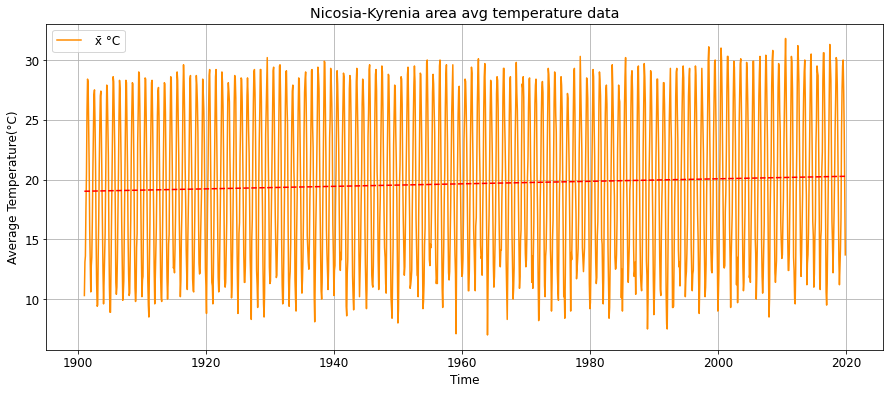

In [21]:
plt.rc('font', size=12)
fig, ax = plt.subplots(figsize=(15, 6))

# Specify how our lines should look
ax.plot(nikyr['Date'], nikyr['Mean Temperature(°C)'], color='darkorange', label=' x̄ °C')

# Same as above
ax.set_xlabel('Time')
ax.set_ylabel('Average Temperature(°C)')
ax.set_title('Nicosia-Kyrenia area avg temperature data')
ax.grid(True)
ax.legend(loc='upper left')

x=mdates.date2num(nikyr['Date'])
y=nikyr['Mean Temperature(°C)']
z = np.polyfit(x, y, 1)
p = np.poly1d(z)
pylab.plot(x, p(x), "r--")

## Famagusta-Mesaoria-Akanthou Area

In [4]:
ft = pd.read_excel("famagusta_temp.xlsx")
ftr= pd.read_excel("famagusta_temp_range.xlsx")
fp=pd.read_excel("famagusta_precipitation.xlsx")
fvp=pd.read_excel("famagusta_vapor_pressure.xlsx")
#####
ft['Mean Temperature(°C)']=ft["Value"]
ftr['Temperature Range(°C)']=ftr["Value"]
fp['Precipitation (mm)']=fp["Value"]
fvp['Vapor Pressure (HPa)']=fvp["Value"]

In [5]:
df1=ft.head()
df2=ftr.head()
df3=fp.head()
df4=fvp.head()


df1_styler = df1.style.set_table_attributes("style='display:inline'").set_caption('Nicosia -Kyrenia Area Mean Temperature')
df2_styler = df2.style.set_table_attributes("style='display:inline'").set_caption('Nicosia -Kyrenia AreaTemperature Range')
df3_styler = df3.style.set_table_attributes("style='display:inline'").set_caption('Nicosia -Kyrenia Area Precipitation')
df4_styler = df4.style.set_table_attributes("style='display:inline'").set_caption('Nicosia -Kyrenia Area Vapor Pressure')

display_html(df1_styler._repr_html_() + df2_styler._repr_html_() + df3_styler._repr_html_() + df4_styler._repr_html_(), raw=True)

,Yr,Mo,Value,Obs,Mean Temperature(°C)
0,1901,1,10.700000,8,10.700000
1,1901,2,13.400000,8,13.400000
2,1901,3,13.900000,6,13.900000
3,1901,4,17.500000,7,17.500000
4,1901,5,20.000000,8,20.000000
,Yr,Mo,Value,Obs,Temperature Range(°C)
0,1901,1,9.600000,2,9.600000
1,1901,2,9.800000,1,9.800000
2,1901,3,11.200000,1,11.200000
3,1901,4,12.400000,1,12.400000


In [10]:
## Merge Datasets
f1=pd.merge(ft,ftr,on=['Yr','Mo'],how="outer")
f1=f1.drop(columns=['Value_x','Value_y','Obs_x','Obs_y'])
f2=pd.merge(fp,fvp,on=['Yr','Mo'],how='outer')
f2=f2.drop(columns=['Value_x','Obs_x','Value_y','Obs_y','Syn'])
###
fam=pd.merge(f1,f2,on=['Yr','Mo'],how='outer')
fam=fam.rename(columns={'Mo':'Month'})
fam.head()

,Yr,Month,Mean Temperature(°C),Temperature Range(°C),Precipitation (mm),Vapor Pressure (HPa)
0,1901,1,10.7,9.6,82.2,8.7
1,1901,2,13.4,9.8,4.0,10.5
2,1901,3,13.9,11.2,15.1,10.1
3,1901,4,17.5,12.4,7.1,11.5
4,1901,5,20.0,12.4,73.1,12.5


In [11]:
Date = []
for y,m in zip(fam.Yr,fam.Month) :
    Date.append(date(y,m,1))
fam["Date"]=Date
fam=fam.drop(columns=['Yr','Month'])
fam.head()

,Mean Temperature(°C),Temperature Range(°C),Precipitation (mm),Vapor Pressure (HPa),Date
0,10.7,9.6,82.2,8.7,1901-01-01
1,13.4,9.8,4.0,10.5,1901-02-01
2,13.9,11.2,15.1,10.1,1901-03-01
3,17.5,12.4,7.1,11.5,1901-04-01
4,20.0,12.4,73.1,12.5,1901-05-01


### Time Series Visualizations for Check

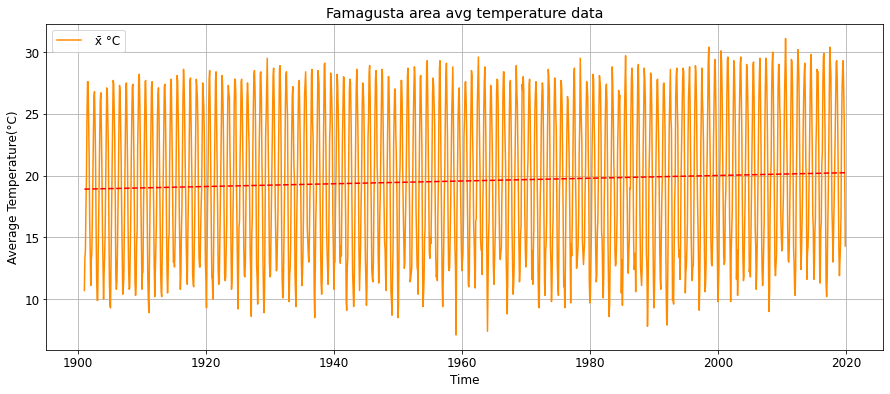

In [16]:
plt.rc('font', size=12)
fig, ax = plt.subplots(figsize=(15, 6))

# Specify how our lines should look
ax.plot(fam['Date'], fam['Mean Temperature(°C)'], color='darkorange', label=' x̄ °C')

# Same as above
ax.set_xlabel('Time')
ax.set_ylabel('Average Temperature(°C)')
ax.set_title('Famagusta area avg temperature data')
ax.grid(True)
ax.legend(loc='upper left')

x=mdates.date2num(fam['Date'])
y=fam['Mean Temperature(°C)']
z = np.polyfit(x, y, 1)
p = np.poly1d(z)
pylab.plot(x, p(x), "r--")

## Karpasia-Vokoldia Area

In [19]:
kart = pd.read_excel("karpaz_temp.xlsx")
kartr= pd.read_excel("karpaz_temp_range.xlsx")
karp=pd.read_excel("karpaz_precipitation.xlsx")
karvp=pd.read_excel("karpaz_vapor_pressure.xlsx")
#####
kart['Mean Temperature(°C)']=kart["Value"]
kartr['Temperature Range(°C)']=kartr["Value"]
karp['Precipitation (mm)']=karp["Value"]
karvp['Vapor Pressure (HPa)']=karvp["Value"]

In [20]:
df1=kart.head()
df2=kartr.head()
df3=karp.head()
df4=karvp.head()


df1_styler = df1.style.set_table_attributes("style='display:inline'").set_caption('Nicosia -Kyrenia Area Mean Temperature')
df2_styler = df2.style.set_table_attributes("style='display:inline'").set_caption('Nicosia -Kyrenia AreaTemperature Range')
df3_styler = df3.style.set_table_attributes("style='display:inline'").set_caption('Nicosia -Kyrenia Area Precipitation')
df4_styler = df4.style.set_table_attributes("style='display:inline'").set_caption('Nicosia -Kyrenia Area Vapor Pressure')

display_html(df1_styler._repr_html_() + df2_styler._repr_html_() + df3_styler._repr_html_() + df4_styler._repr_html_(), raw=True)

,Yr,Mo,Value,Obs,Mean Temperature(°C)
0,1901,1,9.500000,8,9.500000
1,1901,2,12.400000,8,12.400000
2,1901,3,14.000000,7,14.000000
3,1901,4,17.600000,8,17.600000
4,1901,5,20.300000,8,20.300000
,Yr,Mo,Value,Obs,Temperature Range(°C)
0,1901,1,9.100000,2,9.100000
1,1901,2,9.800000,1,9.800000
2,1901,3,11.900000,1,11.900000
3,1901,4,12.800000,1,12.800000


In [23]:
## Merge Datasets
kar1=pd.merge(kart,kartr,on=['Yr','Mo'],how="outer")
kar1=kar1.drop(columns=['Value_x','Value_y','Obs_x','Obs_y'])
kar2=pd.merge(karp,karvp,on=['Yr','Mo'],how='outer')
kar2=kar2.drop(columns=['Value_x','Obs_x','Value_y','Obs_y','Syn'])
###
kar=pd.merge(kar1,kar2,on=['Yr','Mo'],how='outer')
kar=fam.rename(columns={'Mo':'Month'})
kar.head()

,Mean Temperature(°C),Temperature Range(°C),Precipitation (mm),Vapor Pressure (HPa),Date
0,10.7,9.6,82.2,8.7,1901-01-01
1,13.4,9.8,4.0,10.5,1901-02-01
2,13.9,11.2,15.1,10.1,1901-03-01
3,17.5,12.4,7.1,11.5,1901-04-01
4,20.0,12.4,73.1,12.5,1901-05-01


### Time Series Visualizations for each variable

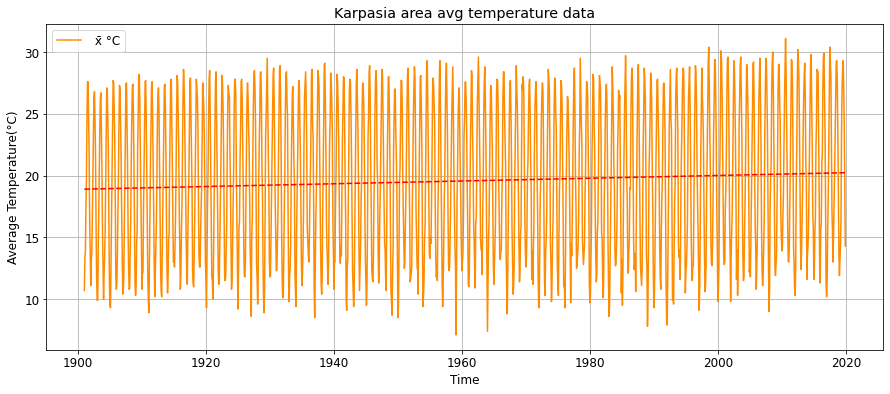

In [25]:
plt.rc('font', size=12)
fig, ax = plt.subplots(figsize=(15, 6))

# Specify how our lines should look
ax.plot(kar['Date'], kar['Mean Temperature(°C)'], color='darkorange', label=' x̄ °C')

# Same as above
ax.set_xlabel('Time')
ax.set_ylabel('Average Temperature(°C)')
ax.set_title('Karpasia area avg temperature data')
ax.grid(True)
ax.legend(loc='upper left')

x=mdates.date2num(kar['Date'])
y=kar['Mean Temperature(°C)']
z = np.polyfit(x, y, 1)
p = np.poly1d(z)
pylab.plot(x, p(x), "r--")